In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.DataFrame({'X':X.reshape(100),'Y':y})

In [5]:
df

,X,Y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


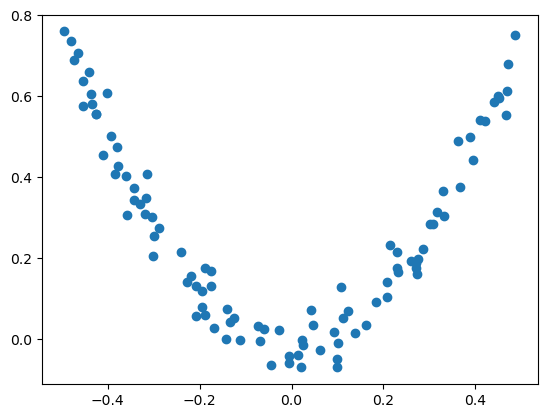

In [6]:
plt.scatter(X,y)

In [7]:
df['m1_pred']=df['Y'].mean()

In [8]:
df

,X,Y,m1_pred
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [9]:
df['res']=df['Y']-df['m1_pred']

In [10]:
df

,X,Y,m1_pred,res
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [11]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [12]:
dt=DecisionTreeRegressor(max_leaf_nodes=8)

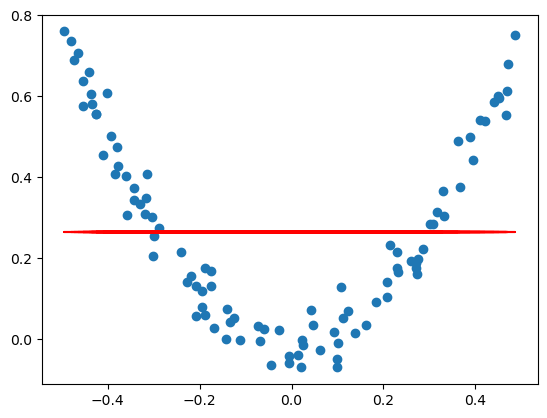

In [13]:
plt.scatter(X,y)
plt.plot(df['X'],df['m1_pred'],c='r')

In [14]:
dt.fit(df['X'].values.reshape(100,1),df['res'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453, 0.25, 'x[0] <= -0.172\nsquared_error = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(0.36363636363636365, 0.0833333

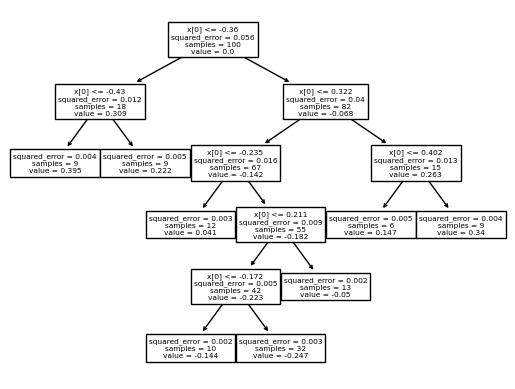

In [15]:
plot_tree(dt)

In [16]:
y_pred=df['Y'].mean()+dt.predict(X)

In [17]:
y_pred.shape

(100,)

In [18]:
df['m2_pred']=y_pred

In [19]:
df

,X,Y,m1_pred,res,m2_pred
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320
96,0.022733,-0.002305,0.265458,-0.267763,0.018320
97,-0.072459,0.032809,0.265458,-0.232650,0.018320
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [20]:
df['res_2']=df['Y']-df['m2_pred']

In [21]:
df

,X,Y,m1_pred,res,m2_pred,res_2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603


In [22]:
dt2=DecisionTreeRegressor(max_leaf_nodes=8)

In [23]:
input=df['X']

In [24]:
dt2.fit(np.array(input).reshape(-1,1),np.array(df['res_2']).reshape(-1,1))

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.3333333333333333, 0.9285714285714286, 'x[0] <= 0.47\nsquared_error = 0.003\nsamples = 100\nvalue = 0.0'),
 Text(0.2222222222222222, 0.7857142857142857, 'x[0] <= -0.46\nsquared_error = 0.003\nsamples = 98\nvalue = -0.002'),
 Text(0.1111111111111111, 0.6428571428571429, 'squared_error = 0.001\nsamples = 4\nvalue = 0.062'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[0] <= -0.43\nsquared_error = 0.003\nsamples = 94\nvalue = -0.005'),
 Text(0.2222222222222222, 0.5, 'squared_error = 0.001\nsamples = 5\nvalue = -0.05'),
 Text(0.4444444444444444, 0.5, 'x[0] <= -0.397\nsquared_error = 0.003\nsamples = 89\nvalue = -0.002'),
 Text(0.3333333333333333, 0.35714285714285715, 'squared_error = 0.003\nsamples = 4\nvalue = 0.056'),
 Text(0.5555555555555556, 0.35714285714285715, 'x[0] <= 0.104\nsquared_error = 0.003\nsamples = 85\nvalue = -0.005'),
 Text(0.3333333333333333, 0.21428571428571427, 'x[0] <= -0.052\nsquared_error = 0.002\nsamples = 51\nvalue = -0.014'),
 Text(0.2222222222222222, 

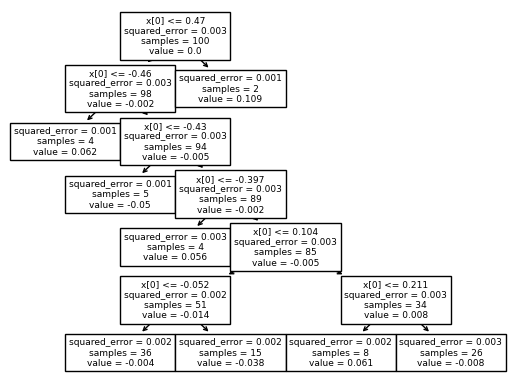

In [25]:
plot_tree(dt2)

In [43]:
y_pred2 = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [dt])

In [27]:
df

,X,Y,m1_pred,res,m2_pred,res_2,m3_pred
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253,0.279779
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.862981
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.472881
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497,0.245648
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021,0.567424
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995,0.245648
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624,0.245648
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489,0.279779
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603,0.988446


In [28]:
X_test=np.linspace(-0.5,0.5,100)

In [29]:
y_pred=df['m1_pred']+dt.predict(X)

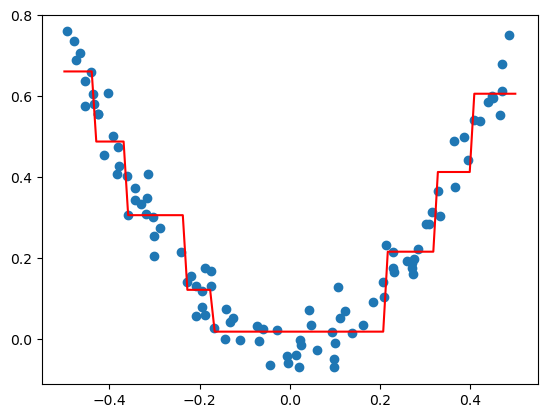

In [44]:
plt.scatter(X,y)
plt.plot(X_test,y_pred2,c='r')

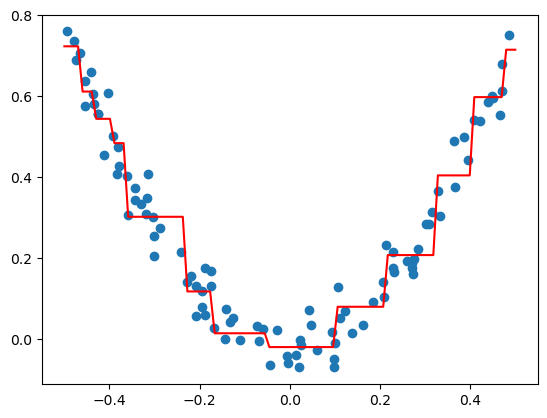

In [46]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [dt,dt2])
plt.scatter(X,y)
plt.plot(X_test,y_pred,c='r')

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
g=GradientBoostingRegressor(n_estimators=3,max_leaf_nodes=8,learning_rate=1)

In [35]:
g.fit(X,y)

GradientBoostingRegressor(learning_rate=1, max_leaf_nodes=8, n_estimators=3)

In [37]:
y_pred3=g.predict(X_test.reshape(-1,1))

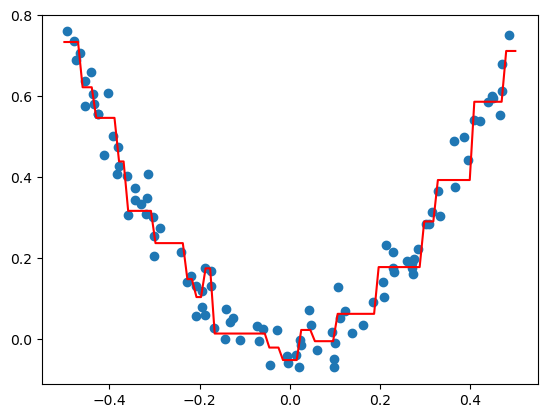

In [39]:
plt.scatter(X,y)
plt.plot(X_test,y_pred3,c='r')

In [50]:
a=df['Y'].mean()
b=dt.predict(X_test.reshape(-1,1))
c=dt2.predict(X_test.reshape(-1,1))

In [51]:
a

0.26545839669679816

In [52]:
b

array([ 0.39545394,  0.39545394,  0.39545394,  0.39545394,  0.39545394,
        0.39545394,  0.39545394,  0.22233842,  0.22233842,  0.22233842,
        0.22233842,  0.22233842,  0.22233842,  0.22233842,  0.04050621,
        0.04050621,  0.04050621,  0.04050621,  0.04050621,  0.04050621,
        0.04050621,  0.04050621,  0.04050621,  0.04050621,  0.04050621,
        0.04050621,  0.04050621, -0.14386455, -0.14386455, -0.14386455,
       -0.14386455, -0.14386455, -0.14386455, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24713887,
       -0.24713887, -0.24713887, -0.24713887, -0.24713887, -0.24

In [53]:
c

array([ 0.06207488,  0.06207488,  0.06207488,  0.06207488, -0.0496599 ,
       -0.0496599 , -0.0496599 ,  0.05610506,  0.05610506,  0.05610506,
        0.05610506, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.00399869, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.00399869, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.00399869, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.00399869, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.00399869, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.00399869, -0.00399869, -0.00399869, -0.00399869, -0.00399869,
       -0.0381304 , -0.0381304 , -0.0381304 , -0.0381304 , -0.0381304 ,
       -0.0381304 , -0.0381304 , -0.0381304 , -0.0381304 , -0.0381304 ,
       -0.0381304 , -0.0381304 , -0.0381304 , -0.0381304 , -0.0381304 ,
        0.06143609,  0.06143609,  0.06143609,  0.06143609,  0.06143609,
        0.06143609,  0.06143609,  0.06143609,  0.06143609,  0.06

In [54]:
d=a+b+c

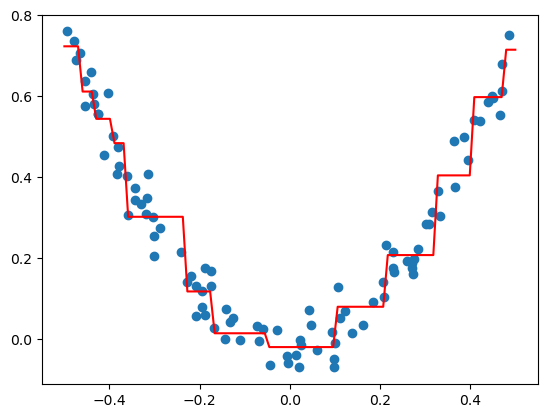

In [56]:
plt.scatter(X,y)
plt.plot(X_test,d,c='r')